In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
# device config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
# hyperparameter 

input_size = 784
hidden_size = 100
num_classes=  10
num_epochs = 2
batch_size= 100
learning_rate =0.001


In [20]:
# MINIST Dataset

train_dataset=torchvision.datasets.MNIST(root='./data',train = True,
                                        transform = transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train = False,
                                        transform = transforms.ToTensor())

train_loader= torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle = True)
test_loader= torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle =False)

In [21]:
examples =iter(Train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


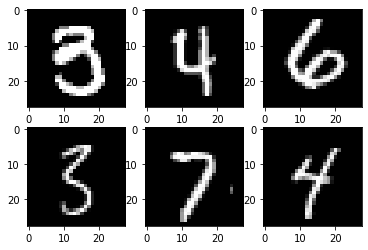

In [22]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [23]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/2], Step [100/600], Loss: 0.5259
Epoch [1/2], Step [200/600], Loss: 0.3422
Epoch [1/2], Step [300/600], Loss: 0.2975
Epoch [1/2], Step [400/600], Loss: 0.3725
Epoch [1/2], Step [500/600], Loss: 0.2119
Epoch [1/2], Step [600/600], Loss: 0.1578
Epoch [2/2], Step [100/600], Loss: 0.1206
Epoch [2/2], Step [200/600], Loss: 0.2535
Epoch [2/2], Step [300/600], Loss: 0.1354
Epoch [2/2], Step [400/600], Loss: 0.1696
Epoch [2/2], Step [500/600], Loss: 0.1489
Epoch [2/2], Step [600/600], Loss: 0.1625
Accuracy of the network on the 10000 test images: 95.08 %
